# Pytorch Tensor

## Tensor 생성

In [1]:
import torch

# 정수형 int64 기본형 (long)
# 실수형 float32 기본형
t1 = torch.tensor([1, 2, 3], dtype=torch.float)
print(t1)
print(type(t1))
print(t1.dtype)
print(t1.shape)
print(t1.size())
print(t1.dim())
print(t1.device) # cpu램 적재

tensor([1., 2., 3.])
<class 'torch.Tensor'>
torch.float32
torch.Size([3])
torch.Size([3])
1
cpu


In [2]:
t2 = torch.tensor([[1., 2., 3.],
                   [4., 5., 6.]])
print(t2)
print(type(t2))
print(t2.dtype)
print(t2.shape)
print(t2.size())
print(t2.dim())
print(t2.device)


tensor([[1., 2., 3.],
        [4., 5., 6.]])
<class 'torch.Tensor'>
torch.float32
torch.Size([2, 3])
torch.Size([2, 3])
2
cpu


In [3]:
# 0 또는 1로 tensor생성
print(torch.ones(2, 3)) # 자료형 float32
print(torch.zeros(2, 3, dtype=torch.int))

x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

print(torch.ones_like(x))
print(torch.zeros_like(x))


tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)
tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[0, 0, 0],
        [0, 0, 0]])


In [4]:
# 난수 생성
# - 정규분포
print(torch.normal(10, 1, (2, 2))) # 평균, 표준편차, 크기
print(torch.randn((2, 2))) # 크기
print(torch.randn_like(x.float())) # long -> float 변환 후 처리

# - 균등분포
print(torch.rand(2, 2)) # 0 ~ 1 사이
print(torch.randint(1, 10, (2, 2))) # 1이상 10미만
print(torch.rand_like(x.float())) # 0 ~ 1 사이

# - 그외
print(torch.empty(2, 3)) # 초기화되지 않은 텐서 (쓰레기값)

tensor([[10.0003, 11.0723],
        [10.1826,  9.8700]])
tensor([[-0.3471,  1.8947],
        [ 0.2490,  0.1668]])
tensor([[ 0.2788,  0.7152,  0.6765],
        [ 0.1988, -0.2986, -0.1113]])
tensor([[0.6310, 0.0408],
        [0.6835, 0.2121]])
tensor([[1, 8],
        [9, 1]])
tensor([[0.9739, 0.5128, 0.7296],
        [0.2010, 0.7657, 0.4790]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
# numpy ndarray 호환
import numpy as np

x = np.array([1, 2, 3])
print(x, type(x))

t = torch.from_numpy(x)
print(t, type(t))

x2 = t.numpy()
print(x2, type(x2))

[1 2 3] <class 'numpy.ndarray'>
tensor([1, 2, 3]) <class 'torch.Tensor'>
[1 2 3] <class 'numpy.ndarray'>


## 연산

In [6]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float)

b = torch.tensor([[7, 8, 9],
                  [10, 11, 12]], dtype=torch.float)

c = torch.tensor([[1, 2],
                  [3, 4],
                  [5, 6]], dtype=torch.float)

print(a.shape, b.shape, c.shape)

torch.Size([2, 3]) torch.Size([2, 3]) torch.Size([3, 2])


In [7]:
print(a + b)
print(a - b)
print(a * b)
print(a / b)
print(a // b)
print(a % b)

tensor([[ 8., 10., 12.],
        [14., 16., 18.]])
tensor([[-6., -6., -6.],
        [-6., -6., -6.]])
tensor([[ 7., 16., 27.],
        [40., 55., 72.]])
tensor([[0.1429, 0.2500, 0.3333],
        [0.4000, 0.4545, 0.5000]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [8]:
# broadcasting 연산
print(a + 1)
print(a + torch.tensor([10, 20, 30]))
# print(a + torch.tensor([10, 20])) # 마지막 축부터 검사 : 1 또는 숫자가 같지 않은 경우 브로드캐스팅 불가

tensor([[2., 3., 4.],
        [5., 6., 7.]])
tensor([[11., 22., 33.],
        [14., 25., 36.]])


In [9]:
# 내적 (모든 원소간의 곱을 더하기)
# 1차원 : torch.dot(), torch.matmul(), @
# 2차원이상 : torch.matmul(), @
m = torch.tensor([1, 2, 3])
n = torch.tensor([4, 5, 6])
print(m.dot(n))
print(torch.dot(m, n))
print(torch.matmul(m, n))
print(m @ n)

tensor(32)
tensor(32)
tensor(32)
tensor(32)


In [10]:
# 2차원 이상
print(a.matmul(c)) # (2, 3) @ (3, 2)
print(a @ c)
# print(torch.dot(a, c)) # RuntimeError: 1D tensors expected, but got 2D and 2D tensors

tensor([[22., 28.],
        [49., 64.]])
tensor([[22., 28.],
        [49., 64.]])


## 통계연산
축을 지정해서 연산하는 sum, mean, max, min 등

In [11]:
# 합계
"""
[[1, 2, 3],
 [4, 5, 6]]
"""
print(torch.sum(a, dim=0))
print(torch.sum(a, dim=1))
print(torch.sum(a, dim=None))

# 평균
print(torch.mean(a, dim=0))
print(torch.mean(a, dim=1))
print(torch.mean(a, dim=None))

tensor([5., 7., 9.])
tensor([ 6., 15.])
tensor(21.)
tensor([2.5000, 3.5000, 4.5000])
tensor([2., 5.])
tensor(3.5000)


## 형변환
astype 대신 해당 자료형 메소드 호출

In [12]:
x = torch.tensor([1, 2, 3])
print(x, x.dtype)

print(x.float(), x.float().dtype)
print(x.double(), x.double().dtype)

print(x.int(), x.int().dtype)
print(x.long(), x.long().dtype)

tensor([1, 2, 3]) torch.int64
tensor([1., 2., 3.]) torch.float32
tensor([1., 2., 3.], dtype=torch.float64) torch.float64
tensor([1, 2, 3], dtype=torch.int32) torch.int32
tensor([1, 2, 3]) torch.int64


## 형태변경

In [13]:
t = torch.arange(12) # start, stop, step

t_ = t.reshape(3, 4)
t_ = t.reshape(3, -1)
t_ = t.reshape(-1, 4)
t_ = t.reshape(2, 2, 3)
print(t_, '\n', t_.size())


tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]]) 
 torch.Size([2, 2, 3])


In [14]:
# 전치
t = torch.arange(12).reshape(3, 4)
print(t.T, '\n', t.T.shape)
print(t.transpose(0, 1), '\n', t.transpose(0, 1).shape)

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]]) 
 torch.Size([4, 3])
tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]]) 
 torch.Size([4, 3])


In [15]:
# 평탄화
print(t.flatten())
print(t.reshape(-1))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [16]:
# 차원 축소 squeeze()
x = torch.tensor([[[1, 2], [3, 4]]])
print(x.size())

print(x.squeeze(0), x.squeeze(0).shape)

torch.Size([1, 2, 2])
tensor([[1, 2],
        [3, 4]]) torch.Size([2, 2])


In [17]:
# 차원 추가 unsqeeze()
x = torch.tensor([[1, 2], [3, 4]])
print(x.size())

x_ = x.unsqueeze(0)
x_ = x.unsqueeze(-1)
x_ = x.unsqueeze(1)
print(x_.size())
print(x_)

torch.Size([2, 2])
torch.Size([2, 1, 2])
tensor([[[1, 2]],

        [[3, 4]]])


## indexing | slicing

In [18]:
x = torch.arange(1, 13).reshape(3, 2, 2)
x

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])

In [19]:
x[0]

# x[1][0]
x[1, 0]

x[2,1]
x[-1, -1]

x[-1, -2, -1]
x[-1, 0, -1]


tensor(10)

In [20]:
# slicing
x_ = x[:, 0] # 인덱싱을 사용한 1차원 제거
x_ = x[:, :1] # 슬라이싱은 차원 유지
print(x_)
print(x_.shape)

tensor([[[ 1,  2]],

        [[ 5,  6]],

        [[ 9, 10]]])
torch.Size([3, 1, 2])


In [21]:
# fancy indexing
index = [1, 2]
x_ = x[index]
print(x_.shape)
print(x_)

torch.Size([2, 2, 2])
tensor([[[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])


## 유용한 메소드

In [22]:
# split
# - 지정한 개수로 분할, 마지막은 지정한 개수보다 작을 수 있다.
x = torch.zeros(10, 4)
x_splits = torch.split(x, 4)
x_splits

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

In [23]:
# expand : 해당 차원의 데이터를 반복 확장
k = torch.tensor([[[1, 2]],
                   [[3, 4]]])
print(k.shape)

k_exp = k.expand(2, 3, 2)
print(k_exp)
print(k_exp.shape)

torch.Size([2, 1, 2])
tensor([[[1, 2],
         [1, 2],
         [1, 2]],

        [[3, 4],
         [3, 4],
         [3, 4]]])
torch.Size([2, 3, 2])


In [24]:
# 원본 배열 k의 view형태로 k_exp가 생성된 것이다.
# k_exp가 k를 참조. k_exp를 변경하면 원본 배열로 변경된다.
k_exp[0, 0, 0] = 100
print(k_exp)
print(k)

tensor([[[100,   2],
         [100,   2],
         [100,   2]],

        [[  3,   4],
         [  3,   4],
         [  3,   4]]])
tensor([[[100,   2]],

        [[  3,   4]]])


In [25]:
# repeat : 원본 배열의 view 생성 없이 실제 값 복사
k = torch.tensor([[[1, 2]],
                   [[3, 4]]])
print(k.shape)

k_rep = k.repeat(1, 3, 1)
print(k_rep)
print(k_rep.shape)

k_rep[0, 0, 0] = 100
print(k_rep)
print(k)

torch.Size([2, 1, 2])
tensor([[[1, 2],
         [1, 2],
         [1, 2]],

        [[3, 4],
         [3, 4],
         [3, 4]]])
torch.Size([2, 3, 2])
tensor([[[100,   2],
         [  1,   2],
         [  1,   2]],

        [[  3,   4],
         [  3,   4],
         [  3,   4]]])
tensor([[[1, 2]],

        [[3, 4]]])


In [26]:
# masked_fill : mask 조건식이 true인 경우만 값 변경
x = torch.arange(9).reshape(3, -1)
print(x)

mask = x > 4
print(mask)

x_ = x.masked_fill(mask, value=0) # True인 위치를 0으로 채우기
print(x_)

x[mask] # True인 위치의 값

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[False, False, False],
        [False, False,  True],
        [ True,  True,  True]])
tensor([[0, 1, 2],
        [3, 4, 0],
        [0, 0, 0]])


tensor([5, 6, 7, 8])

## 모델 학습에서 tensor 다차원 배열 연산

In [27]:
import torch.nn as nn

# 단층 선형 연산
X = torch.randn(4, 5) # 입력
W = torch.randn(5, 3) # Linear Layer기준 (3개의 노드)
b = torch.randn(1, 3) # 노드마다 절편

# Linear층 계산
z = torch.matmul(X, W) + b

# 활성화 함수 relu
# output = nn.ReLU()(z)

relu = nn.ReLU()
output = relu(z)
output

tensor([[2.3525, 1.6313, 0.0000],
        [3.2051, 1.5979, 0.0000],
        [0.0000, 2.0578, 0.0000],
        [0.0000, 0.0000, 0.0000]])

In [28]:
# Linear layer 클래스 사용
class SimpleNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.layer = nn.Linear(input_dim, output_dim)
        # 선형층 W (input_dim, output_dim)
        # 선형층 b (1, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        z = self.layer(x)
        output = self.relu(z)
        return output

model = SimpleNet(input_dim=5, output_dim=3)
output = model(X)
print(output)


tensor([[0.2101, 0.3077, 0.0000],
        [0.1618, 0.3262, 0.2246],
        [0.0000, 0.4869, 0.0000],
        [0.0000, 0.3824, 0.0000]], grad_fn=<ReluBackward0>)


## 실습문제
### 💡 조건


* 입력: 샘플 수 6개, 특성 수 10개
* 은닉층: 입력 10 → 출력 8 (활성화 함수: `tanh`)
* 출력층: 입력 8 → 출력 4 (활성화 함수: `softmax`)
* PyTorch 사용






### 문제 1. 직접 가중치/절편을 선언하고 순전파 계산


다음 조건에 맞게 PyTorch 텐서를 사용하여 forward 계산을 수동으로 구현하세요.


**요구사항**


1. 입력 `X`는 `torch.randn(6, 10)` 으로 생성한다.
2. `W1`, `b1`, `W2`, `b2`도 torch의 `randn`을 이용해 직접 정의한다.
3. 은닉층에서는 `tanh`, 출력층에서는 `softmax`를 사용한다.
4. 최종 결과는 `(6, 4)` 크기의 확률 벡터이어야 한다.


### 문제 2. 위 네트워크를 PyTorch 모델 클래스로 작성


다음 조건에 맞는 `nn.Module` 클래스를 작성하세요.


**요구사항**


1. `__init__`에 `nn.Linear(10, 8)`과 `nn.Linear(8, 4)`를 정의한다.
2. `forward`에서는 `tanh` → `softmax` 순으로 활성화 함수를 적용한다.
3. 임의의 입력 `X = torch.randn(6, 10)`을 모델에 넣어 출력 결과를 확인한다.






### 문제3. 층별 가중치/편향 출력


모델 내 가중치와 편향 값을 확인하고 출력하세요.


In [40]:
# 1. 직접 가중치/절편을 선언하고 순전파 계산
import torch.nn.functional as F

X = torch.randn(6, 10)

# 은닉층 (10, 8) : 8개의 뉴런(노드)
W1 = torch.randn(10, 8)
b1 = torch.randn(1, 8)

# 은닉층 계산
z1 = X @ W1 + b1
z1 = F.tanh(z1)
print(z1.shape)

# 출력층 (8, 4) : 4개의 뉴런(노드)
W2 = torch.randn(8, 4)
b2 = torch.randn(1, 4)

# 출력층 계산
z2 = z1 @ W2 + b2
z2 = F.softmax(z2, dim=1)
print(z2.shape)

# 최종출력
print(torch.sum(z2, dim=1)) # 각 데이터 샘플별 합은 1
print(z2)
print(torch.argmax(z2, dim=1))


torch.Size([6, 8])
torch.Size([6, 4])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
tensor([[0.0643, 0.0235, 0.3986, 0.5136],
        [0.0496, 0.9333, 0.0018, 0.0153],
        [0.2598, 0.1295, 0.1130, 0.4977],
        [0.5061, 0.2845, 0.0761, 0.1333],
        [0.0428, 0.0075, 0.8514, 0.0982],
        [0.0728, 0.8771, 0.0024, 0.0477]])
tensor([3, 1, 3, 0, 2, 1])


In [54]:
# 2. 위 네트워크를 PyTorch 모델 클래스로 작성

class MultiLayerNet(nn.Module):

    def __init__(self, input_dim, num_classes):
        """
        :param input_dim: 입력 데이터의 차원 수 (특성)
        :param output_dim: 정답 클래스의 수
        """
        super().__init__()
        self.hidden = nn.Linear(input_dim, 8) # 은닉층
        self.tanh = nn.Tanh() # 은닉층의 활성화 함수
        self.output = nn.Linear(8, num_classes) # 출력층
        self.softmax = nn.Softmax(dim=1) # 출력층의 활성화 함수

    def forward(self, x):
        z1 = self.hidden(x)
        z1 = self.tanh(z1) # (samples, 8)
        z2 = self.output(z1)
        z2 = self.softmax(z2) # (samples, num_calsses)
        return z2

X = torch.randn(6, 10) # 입력데이터

model = MultiLayerNet(input_dim=X.size(1), num_classes=4)

# 순전파
output = model(X)
print(output)

# 클래스 예측
print(output.argmax(dim=1))

# 자동 미분 계산 그래프에서 분리 후 변환
print(output.detach().numpy())


tensor([[0.3520, 0.2875, 0.1477, 0.2128],
        [0.2916, 0.3041, 0.1860, 0.2184],
        [0.2556, 0.2996, 0.1923, 0.2526],
        [0.2238, 0.2826, 0.2157, 0.2779],
        [0.2653, 0.2645, 0.1944, 0.2758],
        [0.3796, 0.2225, 0.1586, 0.2393]], grad_fn=<SoftmaxBackward0>)
tensor([0, 1, 1, 1, 3, 0])
[[0.35201782 0.28751338 0.14766681 0.212802  ]
 [0.29160494 0.30408084 0.18596359 0.21835065]
 [0.2555598  0.29955474 0.19232894 0.25255653]
 [0.2237708  0.2825996  0.21574731 0.27788228]
 [0.2653385  0.26448298 0.1943986  0.27577993]
 [0.37957764 0.22249573 0.15862936 0.23929735]]


In [57]:
# 3. 층별 가중치/편향 출력
# - model.state_dict()
# - model.parameters()
# - model.layer

import pandas as pd

# 은닉층
layer = model.hidden
W = layer.weight.detach().numpy()
b = layer.bias.detach().numpy()


columns = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'b']
index = ['Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8']
pd.DataFrame(np.column_stack([W, b]), index=index, columns=columns)


,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,b
Node1,0.288516,-0.047685,-0.178661,-0.153524,-0.185152,0.251992,-0.027981,0.136382,0.164443,-0.162630,0.080181
Node2,-0.053162,-0.223785,-0.157844,0.054502,0.266920,0.011073,0.182298,-0.084661,-0.190229,-0.062052,-0.266891
Node3,-0.006012,0.225186,0.071874,0.260204,-0.144950,0.205438,0.109605,-0.079745,0.306539,0.298805,-0.001407
Node4,0.166601,0.047277,-0.180121,0.139787,0.092294,-0.013696,-0.224467,0.118099,0.032614,-0.182257,-0.038833
Node5,-0.032729,-0.012894,-0.262807,0.102580,0.061240,0.038943,0.269483,-0.046587,-0.236087,0.111366,0.128388
Node6,0.020177,-0.235024,0.081355,0.286764,-0.198041,0.184375,0.248091,0.092877,-0.304118,0.159342,-0.177948
Node7,-0.138365,-0.300933,0.218912,0.010457,-0.085457,-0.153680,-0.189125,-0.111494,-0.156516,-0.176581,0.158419
Node8,-0.238140,0.030546,-0.048144,-0.183137,0.125746,-0.311952,-0.052530,0.199091,-0.164785,0.254233,-0.299590


In [61]:
# 출력층
layer = model.output
W = layer.weight.detach().numpy()
b = layer.bias.detach().numpy()

W.shape, b.shape
columns = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'b']
index = ['Node1', 'Node2', 'Node3', 'Node4']
pd.DataFrame(np.column_stack([W, b]), index=index, columns=columns)

,W1,W2,W3,W4,W5,W6,W7,W8,b
Node1,-0.184152,0.133838,0.256270,0.325151,0.236232,-0.148972,-0.236311,-0.173281,0.150948
Node2,0.274383,0.056570,-0.250264,0.150900,0.032767,0.331673,-0.291463,-0.081854,0.243879
Node3,-0.178150,-0.112886,-0.281610,0.335672,0.045113,0.218594,-0.255366,0.224522,-0.093007
Node4,-0.347809,-0.057963,-0.019176,0.207975,0.275500,-0.062250,-0.107221,0.150329,0.053569


## 이미지 데이터 처리
- 컬러 이미지 한장(pytorch기준) : (채널, 높이, 너비)
- 컬러 이미지 한장(matplotlib) : (높이, 너비, 채널)
- 컬러 이미지 여러장(pytorch) : (batch, 채널, 높이, 너비)

In [74]:
# 3차원 데이터(C, H, W)의 mean 연산
# - axis=0, Channel 축을 따라 평균 (H, W)
# - axis=1, Height 축을 따라 평균(C, W)
# - axis=2, Width 축을 따라 평균(C, H)

x = np.arange(1, 25).reshape(2, 3, 4)

print('axis=0 : ', x.mean(axis=0).shape)
print('axis=1 : ', x.mean(axis=1).shape)
print('axis=2 : ', x.mean(axis=2).shape)

x.mean(axis=1)

axis=0 :  (3, 4)
axis=1 :  (2, 4)
axis=2 :  (2, 3)


array([[ 5.,  6.,  7.,  8.],
       [17., 18., 19., 20.]])

(3, 32, 32)
(32, 32)


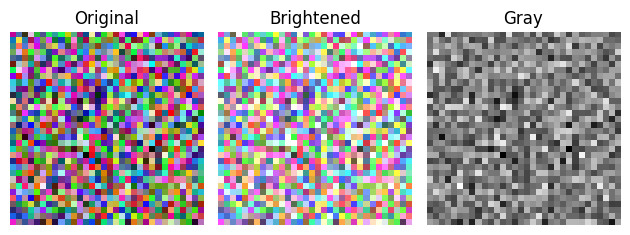

In [82]:
from matplotlib import pyplot as plt

# 이미지 한장 시각화
channels = 3 # rgb
height = 32
width = 32

# torch 이미지 순서
image = np.random.rand(channels, height, width)

# np.clip(arr, min, max) : arr요소 중에 min보다 작은값은 min으로, max보다 큰 값은 max로 클리핑
bright_image = np.clip(image + 0.2, 0, 1)
print(bright_image.shape)

gray_image = np.mean(image, axis=0)
print(gray_image.shape)

# 이미지 출력을 위한 변환
# (C, H, W) -> (H, W, C)
# ndarray.transpose(*axes) : 원하는 축의 인덱스를 작성
image_trans = image.transpose(1, 2, 0)
bright_image_trans = bright_image.transpose(1, 2, 0)

# 이미지 시각화
# plt.subplot(nrows, ncols, index)
# - index 1부터 시작
# - nrowncolsindex 숫자조합
plt.subplot(1, 3, 1) # 131
plt.imshow(image_trans)
plt.title('Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(bright_image_trans)
plt.title('Brightened')
plt.axis('off')

plt.subplot(133)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray')
plt.axis('off')

plt.tight_layout()
plt.show()